# 1.3.4 Algoritmos de agrupamiento particionado

## K-Means

El algoritmo de agrupamiento **k-mean** busca una partición de los datos tal que cada punto esté asignado al grupo cuyo centro (llamado centroide, pues no tiene por qué ser un punto de los datos) sea más cercano. Se le debe indicar el número k de clusters deseado, pues por sí mismo no es capaz de determinarlo.

A grandes rasgos el algoritmo es el siguiente:

1. Elegir k puntos al azar como centroides iniciales. No tienen por qué pertenecer al conjunto de datos, aunque sus coordenadas deben estar en el mismo intervalo.

2. Asignar cada punto del conjunto de datos al centroide más cercano, formándose así k grupos.

3. Recalcular los nuevos centroides de los k grupos, que estarán en el centro geométrico del conjunto de puntos del grupo.

4. Volver al paso 2 hasta que las asignaciones a grupos no varíen o se hayan superado las iteraciones previstas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
estimators = [
    ('k_means_iris_8', KMeans(n_clusters=8)),
    ('k_means_iris_3', KMeans(n_clusters=3)),
    ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))
]

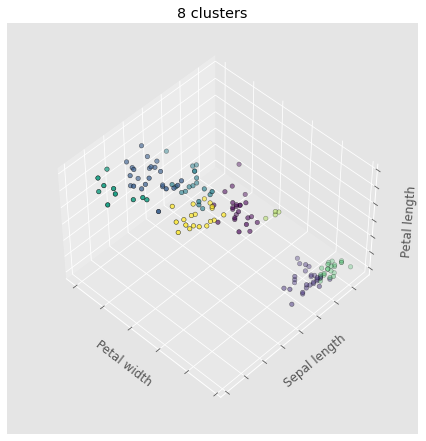

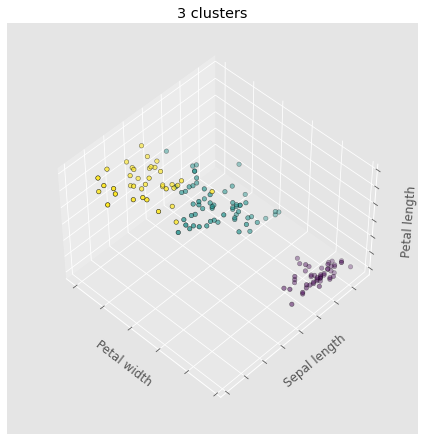

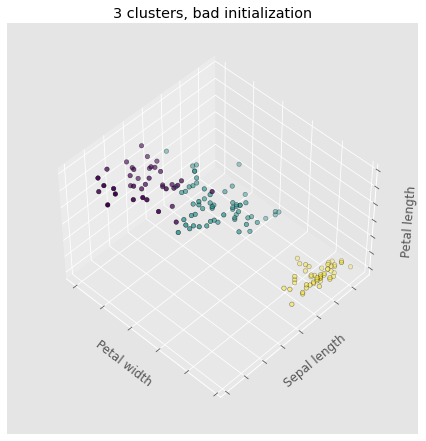

In [6]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(
        X[:, 3], X[:, 0], X[:, 2],
        c=labels.astype(float), edgecolor='k'
    )

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

## Agrupamiento espectral (spectral clustering)

El agrupamiento espectral es un método de agrupamiento muy potente, pues es capaz de agrupar datos teniendo en cuenta las diferencias de densidad, datos convexos (por ejemplo un círculo rodeando a otro), etc. Además indica el número de grupos que deben formarse.

In [7]:
from sklearn.cluster import SpectralClustering

In [8]:
estimator = SpectralClustering()

In [9]:
estimator.fit(X)
labels = estimator.labels_

In [10]:
labels

array([3, 6, 6, 6, 3, 3, 6, 3, 6, 6, 3, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3,
       6, 3, 6, 6, 3, 3, 3, 6, 6, 3, 3, 3, 6, 6, 3, 3, 6, 3, 3, 6, 6, 3,
       3, 6, 3, 6, 3, 6, 0, 0, 0, 5, 0, 5, 0, 2, 0, 5, 2, 5, 5, 0, 5, 0,
       5, 5, 0, 5, 4, 5, 4, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 4, 5, 0, 0, 0,
       5, 5, 5, 0, 5, 2, 5, 5, 5, 0, 2, 5, 7, 4, 7, 4, 7, 1, 5, 7, 7, 7,
       7, 4, 7, 4, 4, 7, 7, 1, 1, 4, 7, 4, 1, 4, 7, 7, 4, 4, 7, 7, 7, 1,
       7, 4, 4, 1, 7, 7, 4, 7, 7, 7, 4, 7, 7, 7, 4, 7, 7, 4], dtype=int32)

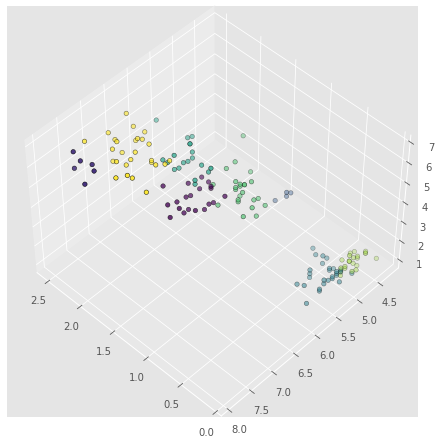

In [11]:
fig = plt.figure(fignum, figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(
    X[:, 3], X[:, 0], X[:, 2],
    c=labels.astype(float), edgecolor='k'
)

plt.show()

In [12]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [13]:
len(set(labels))

8